In [72]:
# Importing all the necessary modules
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

DATA ANALYSIS
1. Exploration

In [73]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [74]:
# I want to create a life_expectancy encoder function that can create a range of values for different life expectancies
def life_expectancy_encoder(x:np.float64):
    if 35 <= x < 40:
        return 1
    elif 40 <= x < 45:
        return 2
    elif 45 <= x < 50:
        return 3
    elif 50 <= x < 55:
        return 4
    elif 55 <= x < 60:
        return 5
    elif 60 <= x < 65:
        return 6
    elif 65 <= x < 70:
        return 7
    elif 70 <= x < 75:
        return 8
    elif 75 <= x < 80:
        return 9
    elif 80 <= x < 85:
        return 10
    elif 85 <= x < 90:
        return 11

In [75]:
df.rename(columns={'Life expectancy ':'Life expectancy','Adult Mortality':'Adult Mortality','infant deaths':'infant deaths',
                   'Hepatitis B':'Hepatitis B','percentage expenditure':'percentage expenditure','Measles ':'Measles',
                   ' BMI ':'BMI','under-five deaths ':'under-five deaths','Total expenditure':'Total expenditure',
                  'Diphtheria ':'Diphtheria',' HIV/AIDS':'HIV/AIDS',' thinness  1-19 years':'thinness 1-19 years',
                  ' thinness 5-9 years':'thinness 5-9 years','Income composition of resources':'Income composition of resources'},inplace=True)
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [76]:
# Here I am trying to convert float values to int so that I  can apply classification models
df["Life expectancy"] = df["Life expectancy"].apply(life_expectancy_encoder)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [78]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,7.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,5.0,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,5.0,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,5.0,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,5.0,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [79]:
# checking the null values of Life expectancy and deleting them
bool1 = pd.isnull(df['Life expectancy'])
df[bool1]
df = df.dropna(subset=['Life expectancy'])

In [80]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,7.314549,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,1.921175,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,1.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,6.000000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,8.000000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,9.000000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,11.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


2. Cleaning

In [81]:
# we are using the analysis to find out the best strategies for data cleaning and 

In [82]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness 1-19 years                 32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

3. Plotting

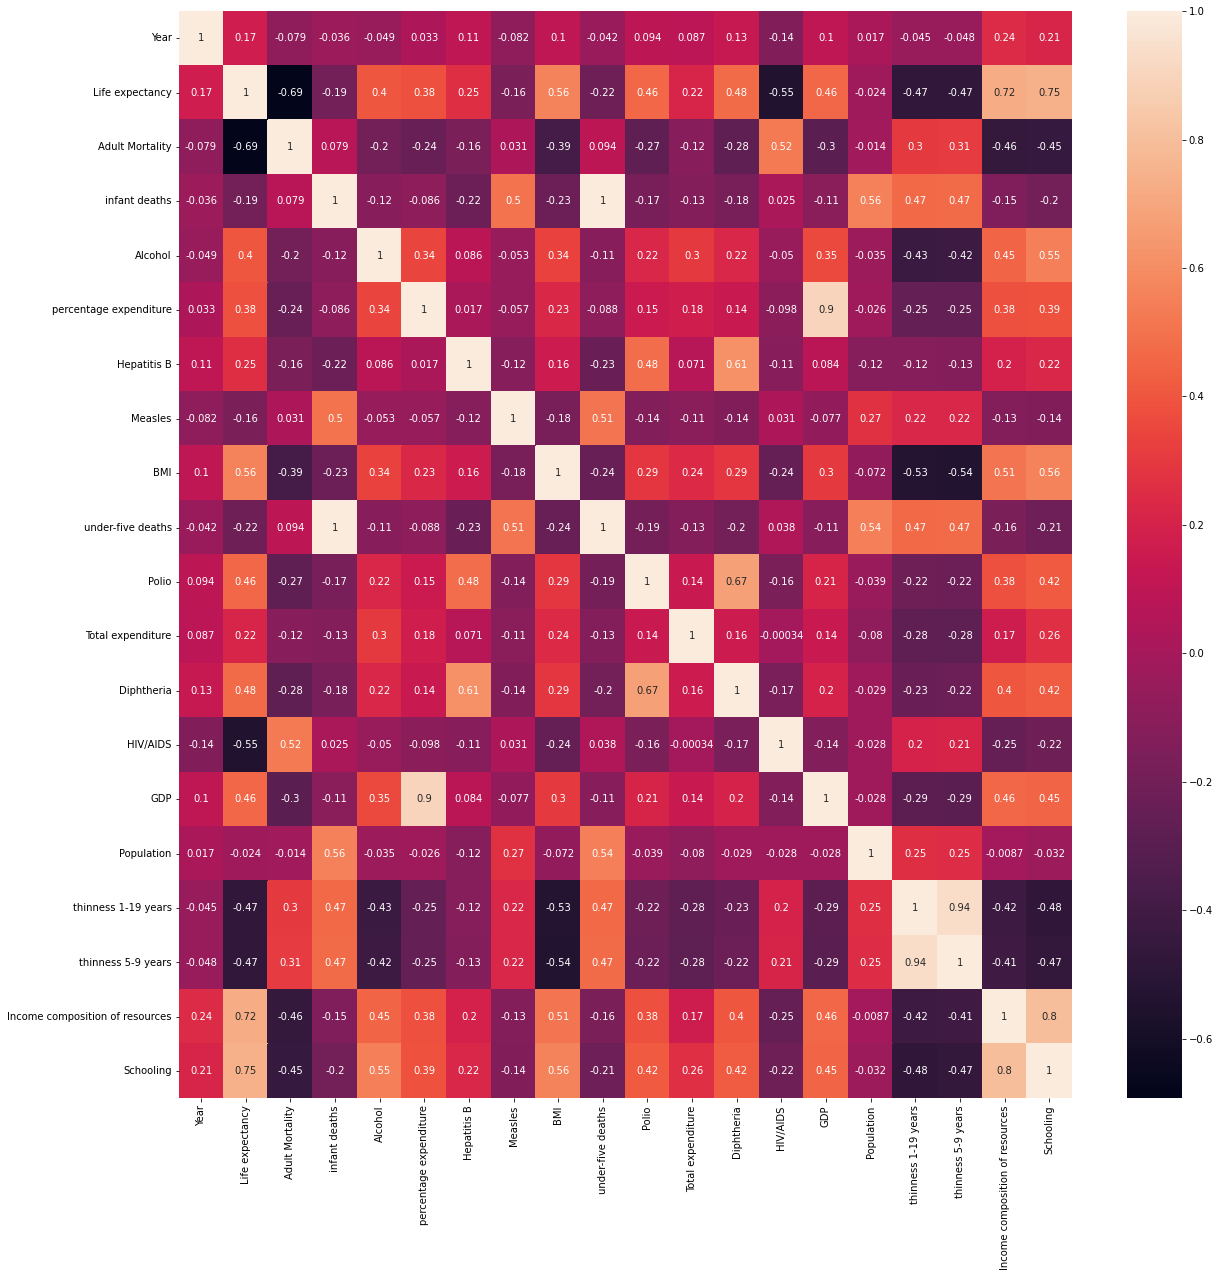

In [83]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

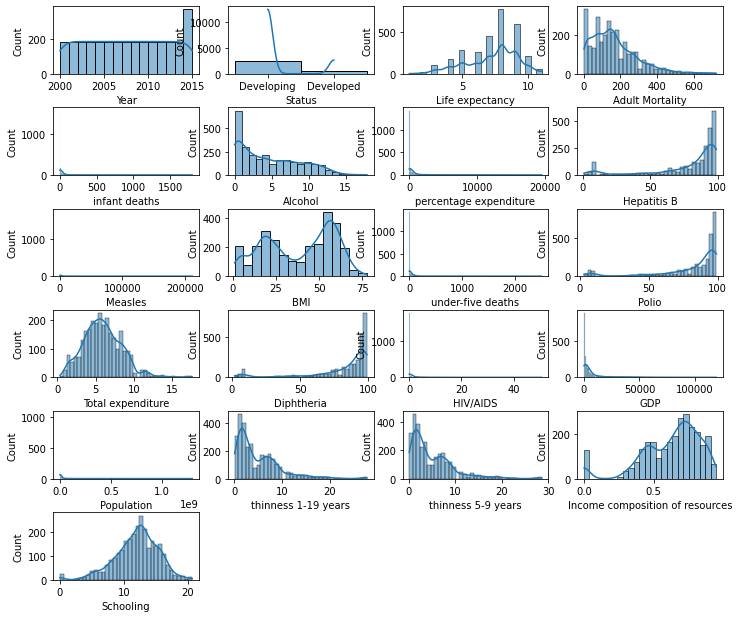

In [84]:
# subplots
plt.figure(figsize=(12,18))
plt.subplots_adjust(hspace=0.5)
i = 1
for col_name in df.drop("Country", axis=1).columns:
    plt.subplot(10,4, i)
    sns.histplot(data=df, x=col_name, kde=True,  multiple='layer', alpha=0.5, palette='viridis')
    i += 1

1. OUTLIERS

In [85]:
iqr = df.quantile(0.75) - df.quantile(0.25)
lower = df.quantile(0.25) - 3*iqr
upper = df.quantile(0.75) + 3*iqr

print("Number of outliers")
((df < lower) + (df > upper)).sum()


Number of outliers


Adult Mortality                      5
Alcohol                              0
BMI                                  0
Country                              0
Diphtheria                         171
GDP                                266
HIV/AIDS                           403
Hepatitis B                        168
Income composition of resources      0
Life expectancy                      0
Measles                            447
Polio                              172
Population                         202
Schooling                            0
Status                               0
Total expenditure                    3
Year                                 0
infant deaths                      158
percentage expenditure             300
thinness 1-19 years                 16
thinness 5-9 years                  16
under-five deaths                  195
dtype: int64

2. Imputing and Encoding

In [86]:
# Label encoding for status of countries
# Label Encoding on the Package attribute
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
#Assigning numerical values and storing in another column
df['Status'] = labelencoder.fit_transform(df['Status'])
# reverse function because it assigned opposite value to "developing" and "developed"
def reverse(x):
    if x == 0:
        return 1
    elif x == 1:
        return 0
df["Status"] = df['Status'].apply(reverse)
df.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,...,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,0.174863,7.314549,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,...,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,0.379915,1.921175,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,...,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,0.000000,1.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,0.000000,6.000000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,...,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,0.000000,8.000000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,...,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,0.000000,9.000000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,...,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,1.000000,11.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [87]:
df = df.drop('Country', axis = 1)

In [88]:
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(strategy='median')

cols_nan = df.columns[df.isnull().sum() > 0]
simple_imputer.fit(df)
df[cols_nan] = simple_imputer.fit_transform(df[cols_nan])

In [89]:
df.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,...,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,0.174863,7.314549,164.796448,30.407445,4.559167,740.321185,83.045765,2427.855874,38.291291,...,82.616120,5.916257,82.390710,1.747712,6627.389707,1.026315e+07,4.833675,4.865232,0.630128,12.016052
std,4.61056,0.379915,1.921175,124.292079,118.114450,3.920534,1990.930605,22.942047,11485.970937,19.857308,...,23.355634,2.385963,23.645132,5.085542,13316.392534,5.411179e+07,4.399553,4.487535,0.205440,3.254407
min,2000.00000,0.000000,1.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,0.000000,6.000000,74.000000,0.000000,1.107500,4.853964,82.000000,0.000000,19.400000,...,78.000000,4.370000,78.000000,0.100000,578.797095,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,2007.50000,0.000000,8.000000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,...,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,0.000000,9.000000,228.000000,22.000000,7.400000,442.614322,96.000000,362.250000,56.100000,...,97.000000,7.330000,97.000000,0.800000,4793.630903,4.592777e+06,7.100000,7.200000,0.773000,14.100000
max,2015.00000,1.000000,11.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,...,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [90]:
df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness 1-19 years                0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

Step 3: Skewness

In [91]:
from scipy.stats import skew
print("Skewness scores for all columns:")
for column in df.columns:
    print(f"{column} : {skew(df[column])}")

Skewness scores for all columns:
Year : 0.0
Status : 1.7119201295040969
Life expectancy : -0.5831213478498636
Adult Mortality : 1.1737677783478573
infant deaths : 9.76603812253009
Alcohol : 0.6466703106310748
percentage expenditure : 4.641410342759306
Hepatitis B : -2.284973570461719
Measles : 9.420460826099431
BMI : -0.23971910667965995
under-five deaths : 9.474765867686411
Polio : -2.107769996031328
Total expenditure : 0.6176441597195285
Diphtheria : -2.0823822675413703
HIV/AIDS : 5.383863232953203
GDP : 3.53481832110617
Population : 17.93410673106506
thinness 1-19 years : 1.726776343796342
thinness 5-9 years : 1.7927308282857028
Income composition of resources : -1.207559460531355
Schooling : -0.6148905912988316


Step 4: Feature Selection¶
Pearson's Correlation Test

Life expectancy                    1.000000
Schooling                          0.713366
Income composition of resources    0.686721
BMI                                0.550037
Status                             0.479763
Diphtheria                         0.470304
Polio                              0.457399
GDP                                0.430267
Alcohol                            0.388562
percentage expenditure             0.380505
Total expenditure                  0.206488
Year                               0.172777
Hepatitis B                        0.170513
Population                        -0.030433
Measles                           -0.158996
infant deaths                     -0.194940
under-five deaths                 -0.220498
thinness 5-9 years                -0.459748
thinness 1-19 years               -0.463883
HIV/AIDS                          -0.545348
Adult Mortality                   -0.693116
Name: Life expectancy, dtype: float64

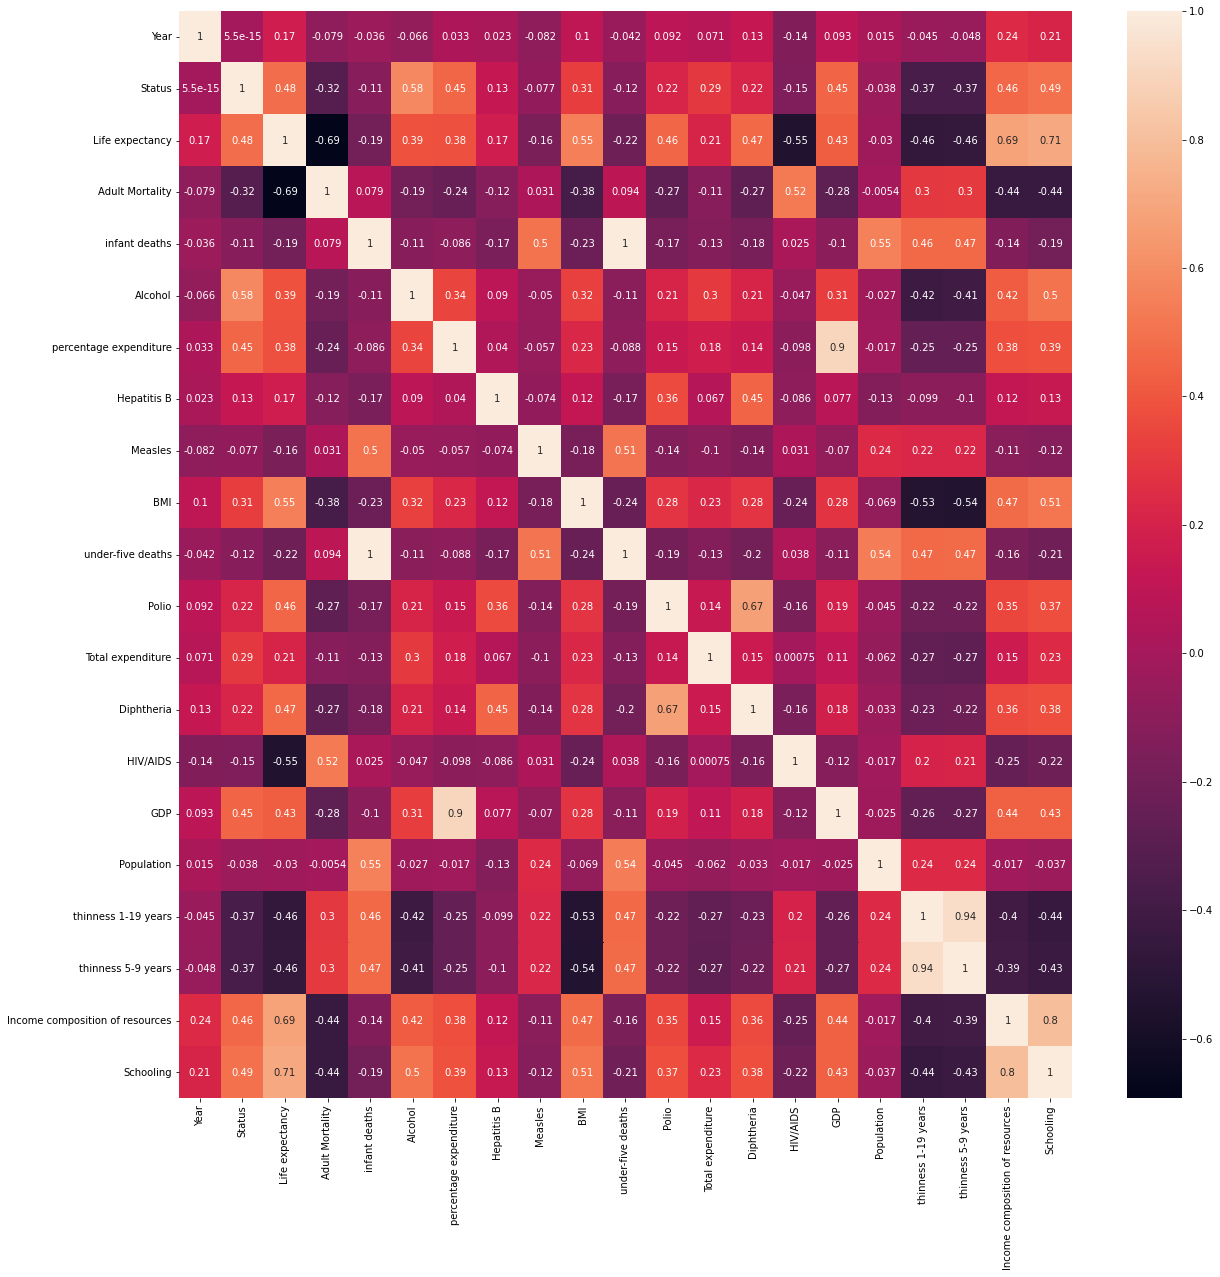

In [92]:
# Heatmap after all changes in the data
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
df.corr()['Life expectancy'].sort_values(ascending=False)

Observations:

The following data points have a very high correlation:

Under five deaths & Infant deaths (0.99)

GDP & percentage expenditure (0.7)

Dipteria & Polio (0.67)

Thinness 5-9 years & Thinness 1-19 years (0.94)

Income compostion of resources & Schooling (0.8)

Information gain

The feature scores generated using Information Gain method are: 
Feature Adult Mortality: 1.069085
Feature Income composition of resources: 0.762995
Feature Schooling: 0.559318
Feature thinness 5-9 years: 0.547155
Feature thinness 1-19 years: 0.525430
Feature HIV/AIDS: 0.511502
Feature under-five deaths: 0.411082
Feature BMI: 0.404479
Feature infant deaths: 0.400162
Feature GDP: 0.316108
Feature percentage expenditure: 0.281554
Feature Diphtheria: 0.274429
Feature Polio: 0.273288
Feature Alcohol: 0.248557
Feature Total expenditure: 0.196719
Feature Status: 0.181794
Feature Population: 0.180676
Feature Hepatitis B: 0.163384
Feature Measles: 0.130446
Feature Year: 0.024264


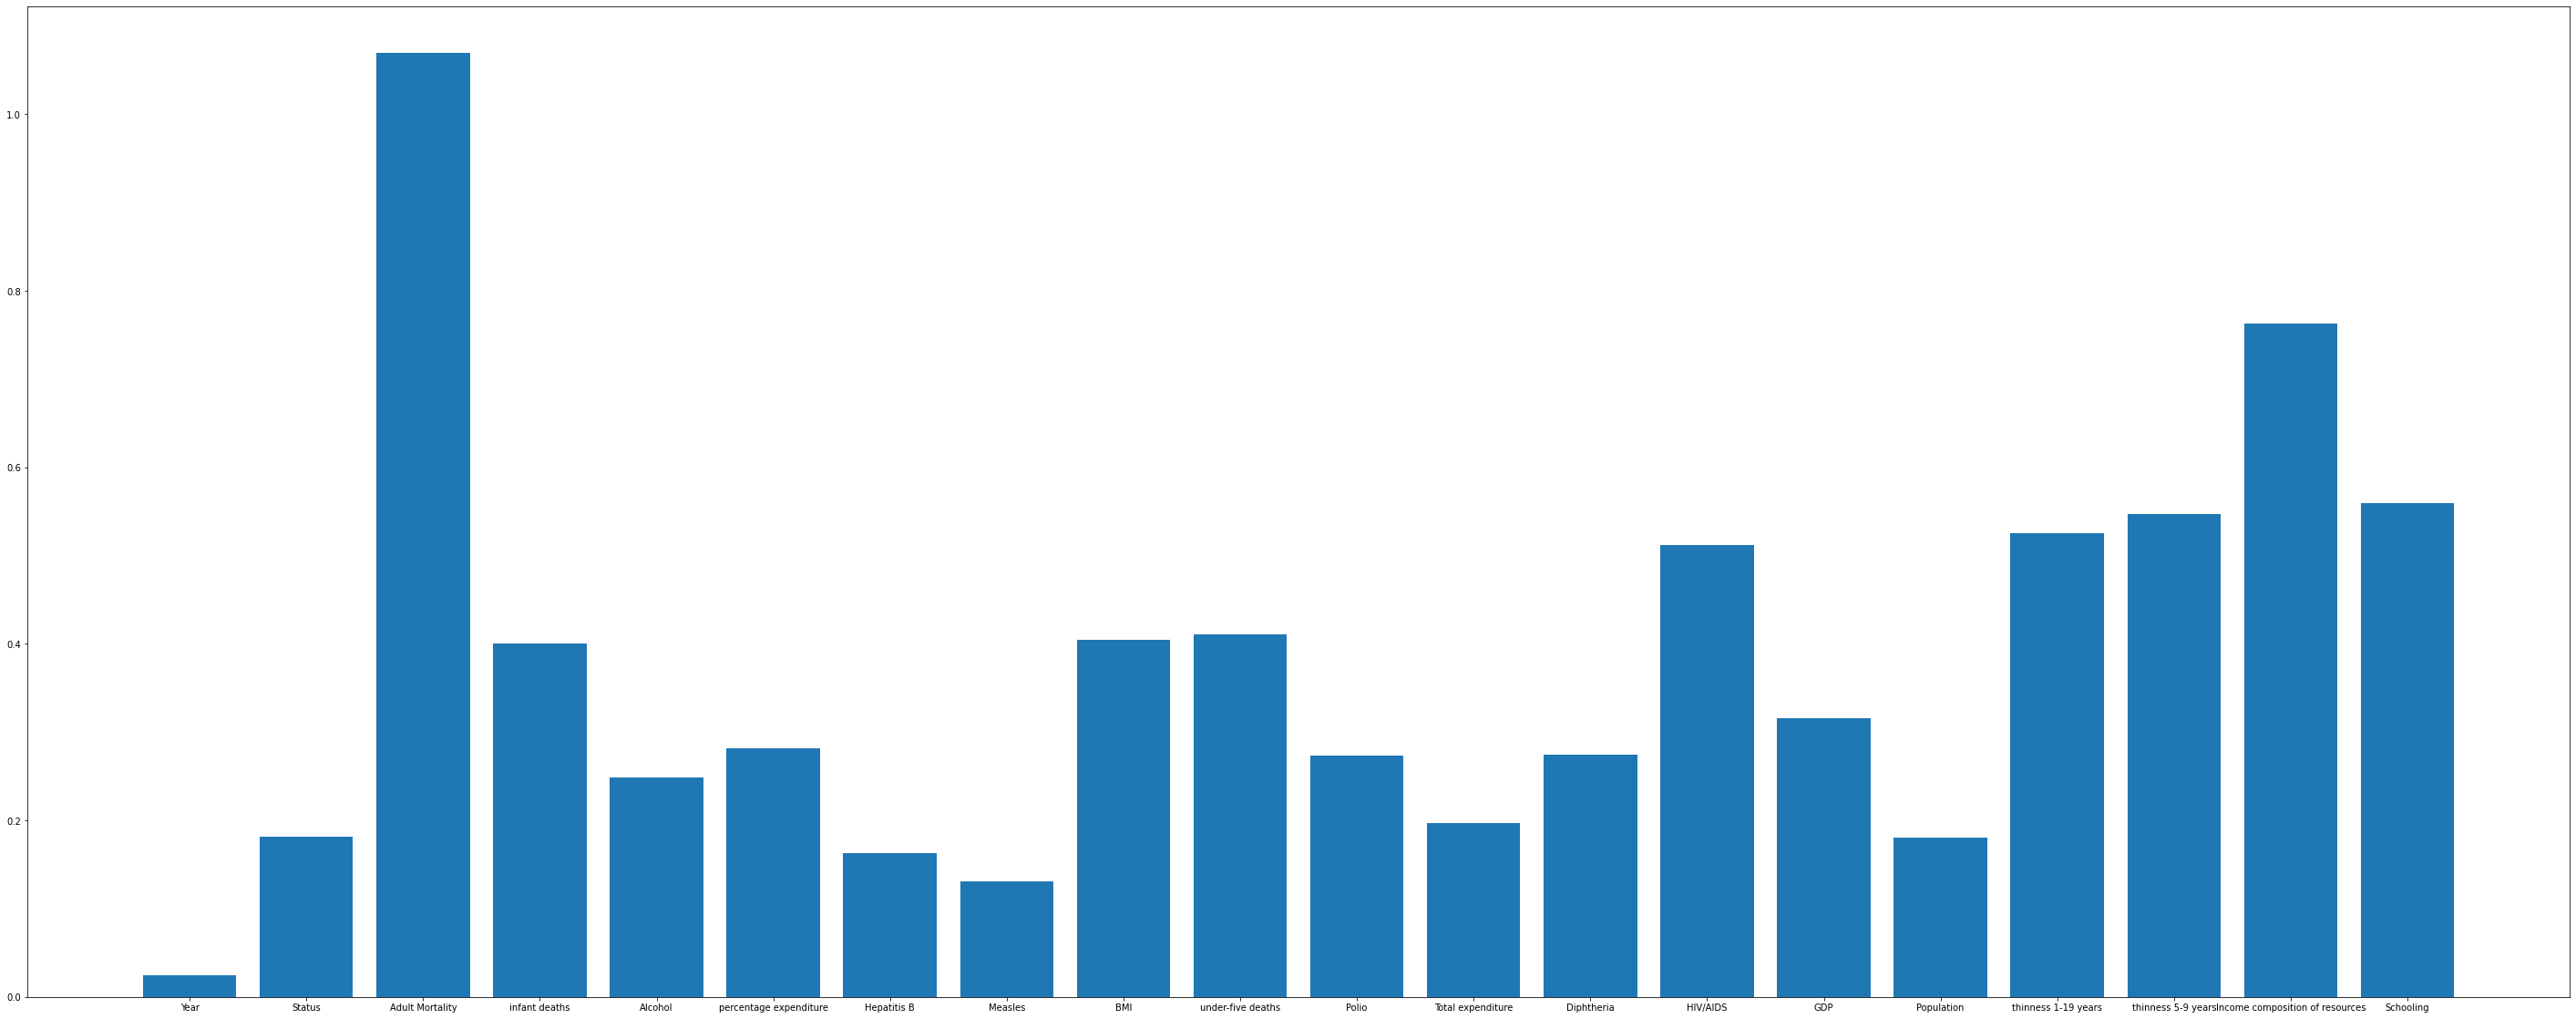

In [93]:
# example of mutual information feature selection for numerical input data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
import matplotlib as plt

X = df.drop(columns = ["Life expectancy"], axis = 1) #feature matrix
y = df["Life expectancy"] #target

fs = SelectKBest(score_func=mutual_info_classif, k='all')
# learn relationship from training data
fs.fit(X, y)
# transform train input data
X_train_fs = fs.transform(X)
features = X.columns
print("The feature scores generated using Information Gain method are: ")
features_map = []
for i in range(len(fs.scores_)):
    features_map.append([features[i], float(fs.scores_[i])])
features_map = sorted(features_map, key=lambda x:x[1], reverse = True)
for i in range(len(fs.scores_)):
	print('Feature %s: %f' % (features_map[i][0], features_map[i][1]))
# plot the scores
pyplot.figure(figsize=(50,20))
pyplot.bar([i for i in features], fs.scores_)
pyplot.show()